In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_excel("C:\\D drive\\Main_Projects\\E_commerce\\Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

STEP 3: Data Cleaning & Preprocessing

In [10]:
# 1. Drop rows with missing CustomerID — we can't analyze anonymous behavior
df = df.dropna(subset=['CustomerID'])

# 2. Remove cancelled orders — 'C' prefix in InvoiceNo indicates cancellation
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Remove rows with Quantity or UnitPrice <= 0 (invalid entries)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 4. Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 5. Create new column: TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 6. Convert CustomerID to int for easier analysis
df['CustomerID'] = df['CustomerID'].astype(int)

# 7. Optional: Reset index after cleaning
df = df.reset_index(drop=True)

# 8. Final check
print(df.shape)
df.head()

(397884, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [11]:
print("Date range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print("Unique customers:", df['CustomerID'].nunique())
print("Unique products:", df['StockCode'].nunique())
print("Countries:", df['Country'].nunique())


Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Unique customers: 4338
Unique products: 3665
Countries: 37


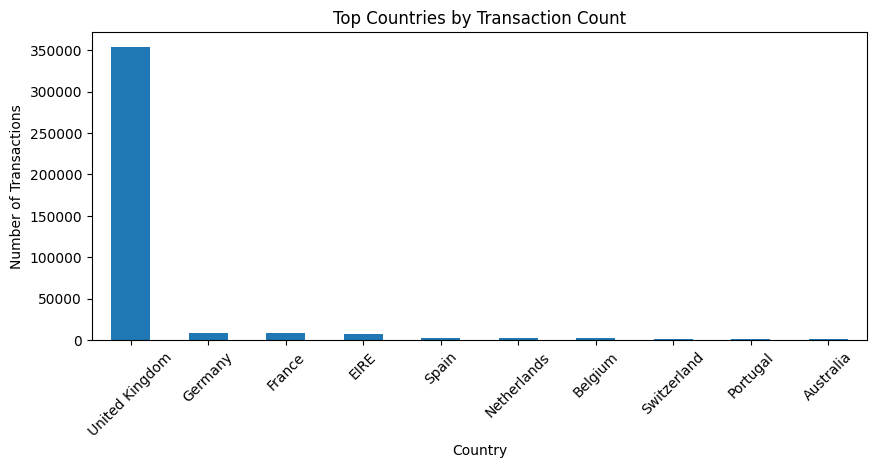

In [12]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(10,4), title='Top Countries by Transaction Count')
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


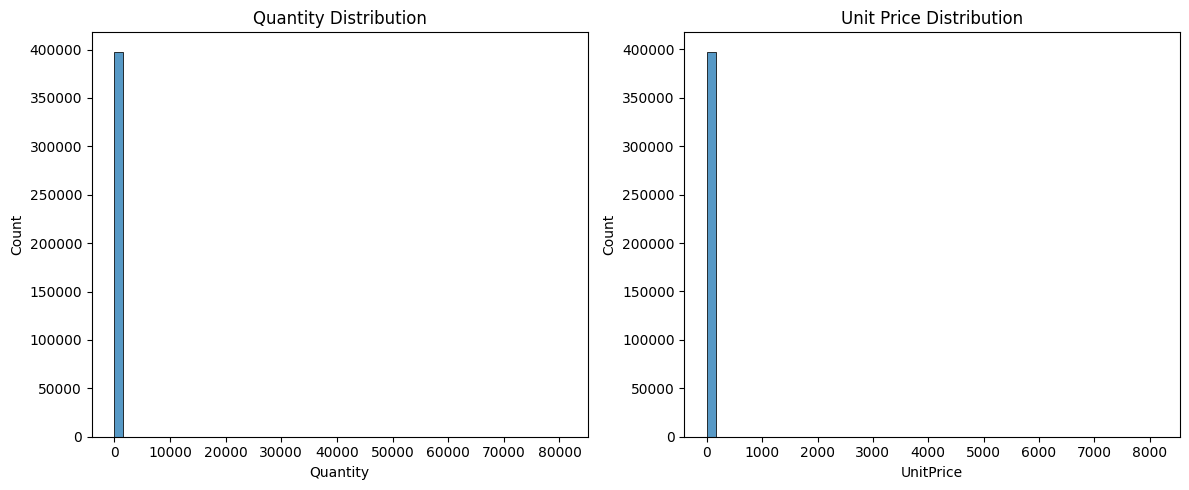

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=False)
plt.title('Quantity Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=False)
plt.title('Unit Price Distribution')

plt.tight_layout()
plt.show()

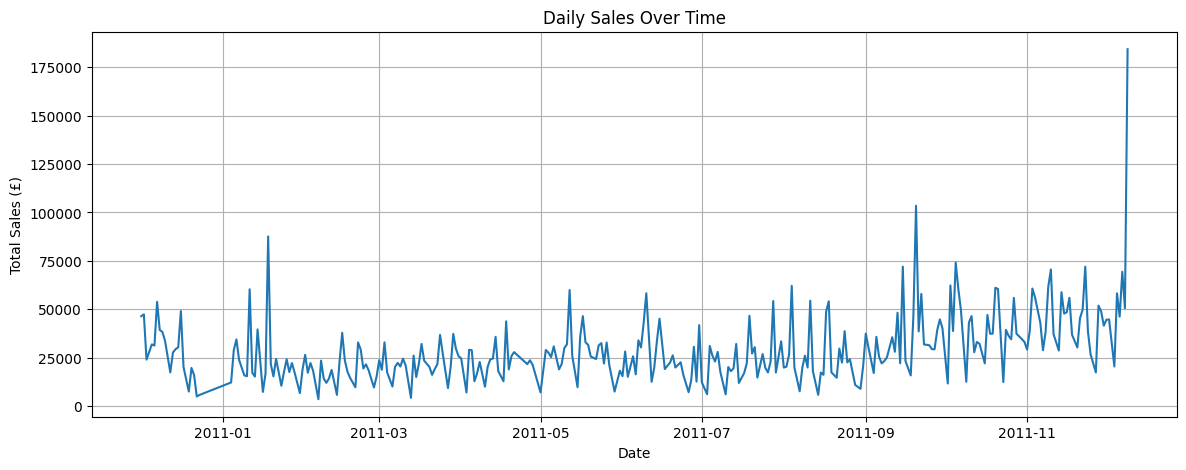

In [14]:
df_daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
df_daily_sales.plot(figsize=(14,5), title='Daily Sales Over Time')
plt.ylabel("Total Sales (£)")
plt.xlabel("Date")
plt.grid(True)
plt.show()


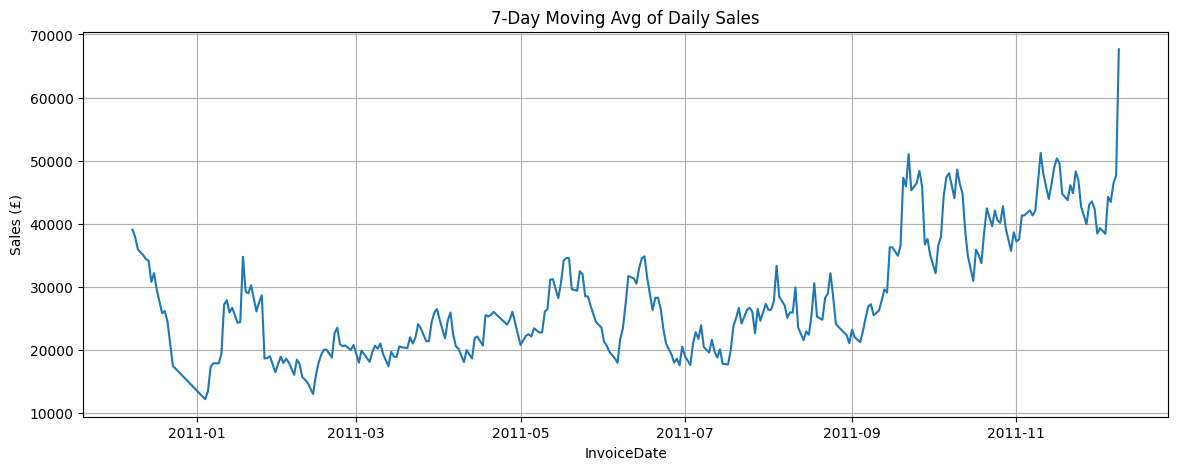

In [15]:
df_daily_sales.rolling(window=7).mean().plot(figsize=(14,5), title='7-Day Moving Avg of Daily Sales')
plt.ylabel("Sales (£)")
plt.grid(True)
plt.show()


Step 4: Feature Engineering – RFM Metrics

We need to define a cut-off date to calculate how many days ago someone last purchased

In [16]:
import datetime as dt

In [17]:
# latest invoice date in the dataset
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print("Snapshot date for RFM analysis:",snapshot_date)

Snapshot date for RFM analysis: 2011-12-10 12:50:00


Group by Customer and Calculate RFM

In [18]:
# Aggregate RFM metrics per CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Show sample
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


RFM Score (Quantile Ranking)

We'll assign scores from 1–5 for each R, F, M metric. You can use quintiles (qcut) to rank

In [19]:
# Recency: lower is better → 5 is most recent
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# Monetary: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# Combine into a single RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,115
12347,2,7,4310.00,5,5,5,555
12348,75,4,1797.24,2,4,4,244
12349,19,1,1757.55,4,1,4,414
12350,310,1,334.40,1,1,2,112


We can create segments based on RFM scores

In [20]:
def segment_customer(score):
    if score == '555':
        return 'Champion'
    elif score[0] == '5':
        return 'Loyal'
    elif score[2] == '5':
        return 'Big Spender'
    elif score == '111':
        return 'Lost'
    elif score[0] == '1':
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
rfm['Segment'].value_counts()


Segment
Others         2154
At Risk         661
Loyal           520
Big Spender     472
Champion        348
Lost            183
Name: count, dtype: int64

STEP 5: CUSTOMER SEGMENTATION (K-MEANS)

STEP 5.1: Prepare Data for Clustering

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Select RFM numeric features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

STEP 5.2: Find Optimal Number of Clusters (Elbow Method)

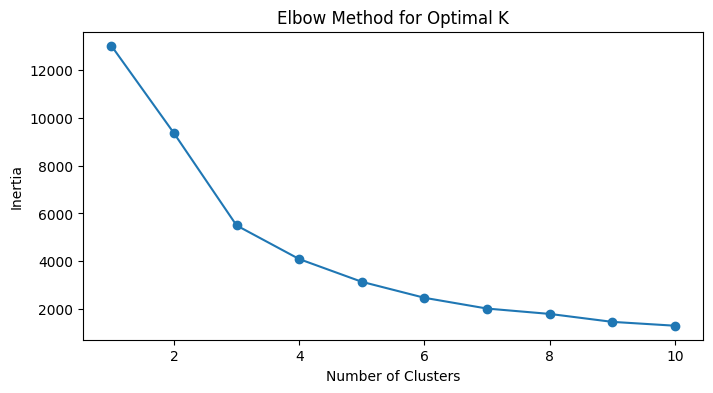

In [23]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


STEP 5.3: Apply K-Means Clustering

In [24]:
# Train final model
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,5,115,Big Spender,3
12347,2,7,4310.00,5,5,5,555,Champion,0
12348,75,4,1797.24,2,4,4,244,Others,0
12349,19,1,1757.55,4,1,4,414,Others,0
12350,310,1,334.40,1,1,2,112,At Risk,1


STEP 5.4: Understand Each Cluster

In [25]:
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_profile


,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


STEP 5.5: Visualize Clusters

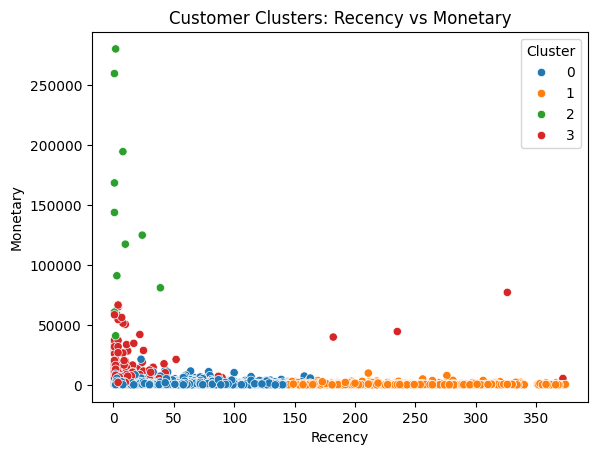

In [26]:
sns.scatterplot(
    x=rfm['Recency'],
    y=rfm['Monetary'],
    hue=rfm['Cluster'],
    palette='tab10'
)
plt.title('Customer Clusters: Recency vs Monetary')
plt.show()


STEP 6.1 — DEFINE CHURN

A customer is churned if they have not purchased in the last 90 days

In [27]:
# Define churn threshold (in days)
CHURN_THRESHOLD = 90

# Create churn label
rfm['Churn'] = np.where(rfm['Recency'] > CHURN_THRESHOLD, 1, 0)

rfm['Churn'].value_counts()


Churn
0    2889
1    1449
Name: count, dtype: int64

STEP 6.2 — SELECT FEATURES & TARGET

In [28]:
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']


STEP 6.3 — TRAIN TEST SPLIT

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

STEP 6.4 — SCALE DATA

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


STEP 6.5 — TRAIN CHURN MODEL

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

STEP 6.6 -- MODEL EVALUATION

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[723   0]
 [  9 353]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       723
           1       1.00      0.98      0.99       362

    accuracy                           0.99      1085
   macro avg       0.99      0.99      0.99      1085
weighted avg       0.99      0.99      0.99      1085



STEP 6.7 — FEATURE IMPORTANCE

In [34]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
0,Recency,11.292354
1,Frequency,0.354478
2,Monetary,-0.576730


STEP 6.8 — OPTIONAL: RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print(classification_report(y_test, rf_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00       362

    accuracy                           1.00      1085
   macro avg       1.00      1.00      1.00      1085
weighted avg       1.00      1.00      1.00      1085



In [37]:
rfm_powerbi = rfm.reset_index()

rfm_powerbi.to_csv("rfm_customer_analysis.csv", index=False)
